In [2]:
import warnings
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np


In [4]:
from  google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [5]:
delivery = pd.read_csv("delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Checking for missing values

In [7]:
delivery.columns=['delivery_time','sorting_time']
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


There are no missing values in the data

Checking for duplicate values

In [10]:
delivery[delivery.duplicated()]

,delivery_time,sorting_time


There are no duplicate values

<Axes: >

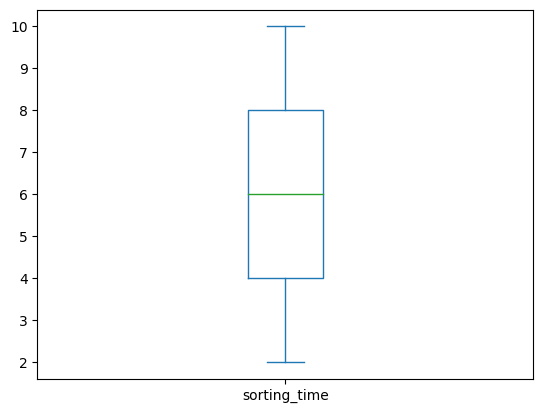

In [11]:
delivery.sorting_time.plot(kind = 'box')

<Axes: >

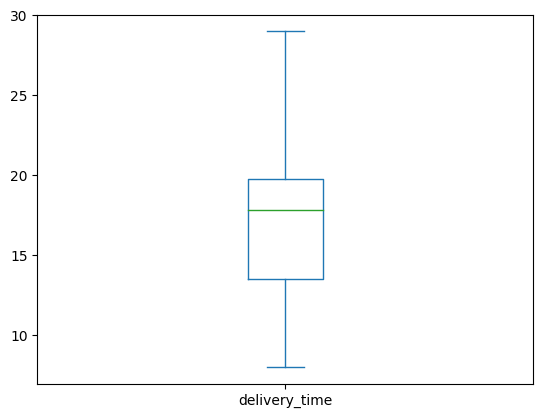

In [12]:
delivery.delivery_time.plot(kind = 'box')

There are no outliers in the data

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


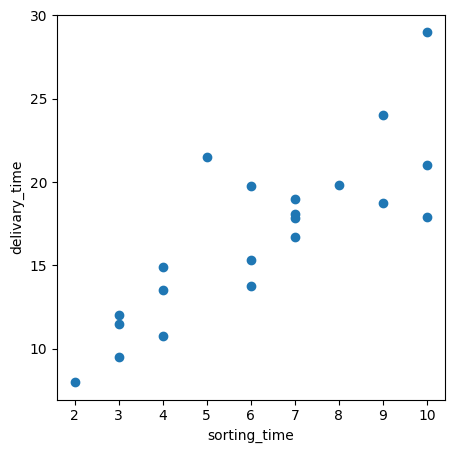

In [20]:
plt.figure(figsize = (5,5))
plt.scatter(delivery['sorting_time'],delivery['delivery_time'])
plt.xlabel('sorting_time')
plt.ylabel('delivary_time')
delivery.corr()

Correlation between delivery_time and sorting_time seems low

<Axes: xlabel='delivery_time', ylabel='Density'>

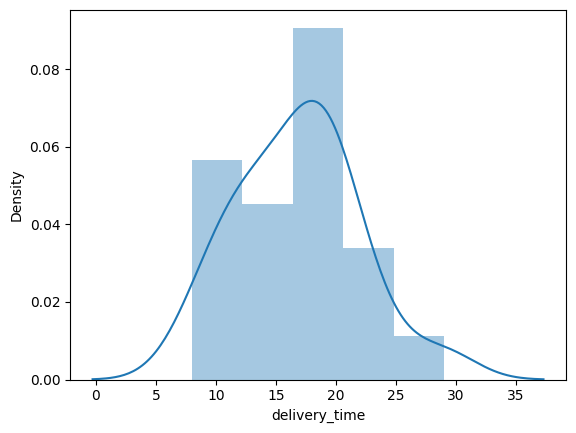

In [22]:
sns.distplot(delivery['delivery_time'])

Applying transformations to see if they result in a higher correlation


In [25]:
delivery['st_sq']=delivery.sorting_time**2
delivery['st_sqrt']=delivery.sorting_time**0.5
delivery['st_log']=np.log(delivery.sorting_time)
delivery['st_sqrt4']=delivery.sorting_time**0.4



,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4
delivery_time,1.000000,0.825997,0.793906,0.834150,0.833933,0.834847
sorting_time,0.825997,1.000000,0.983967,0.994704,0.977447,0.992266
st_sq,0.793906,0.983967,1.000000,0.960816,0.925659,0.954766
st_sqrt,0.834150,0.994704,0.960816,1.000000,0.993904,0.999768
st_log,0.833933,0.977447,0.925659,0.993904,1.000000,0.996045
st_sqrt4,0.834847,0.992266,0.954766,0.999768,0.996045,1.000000


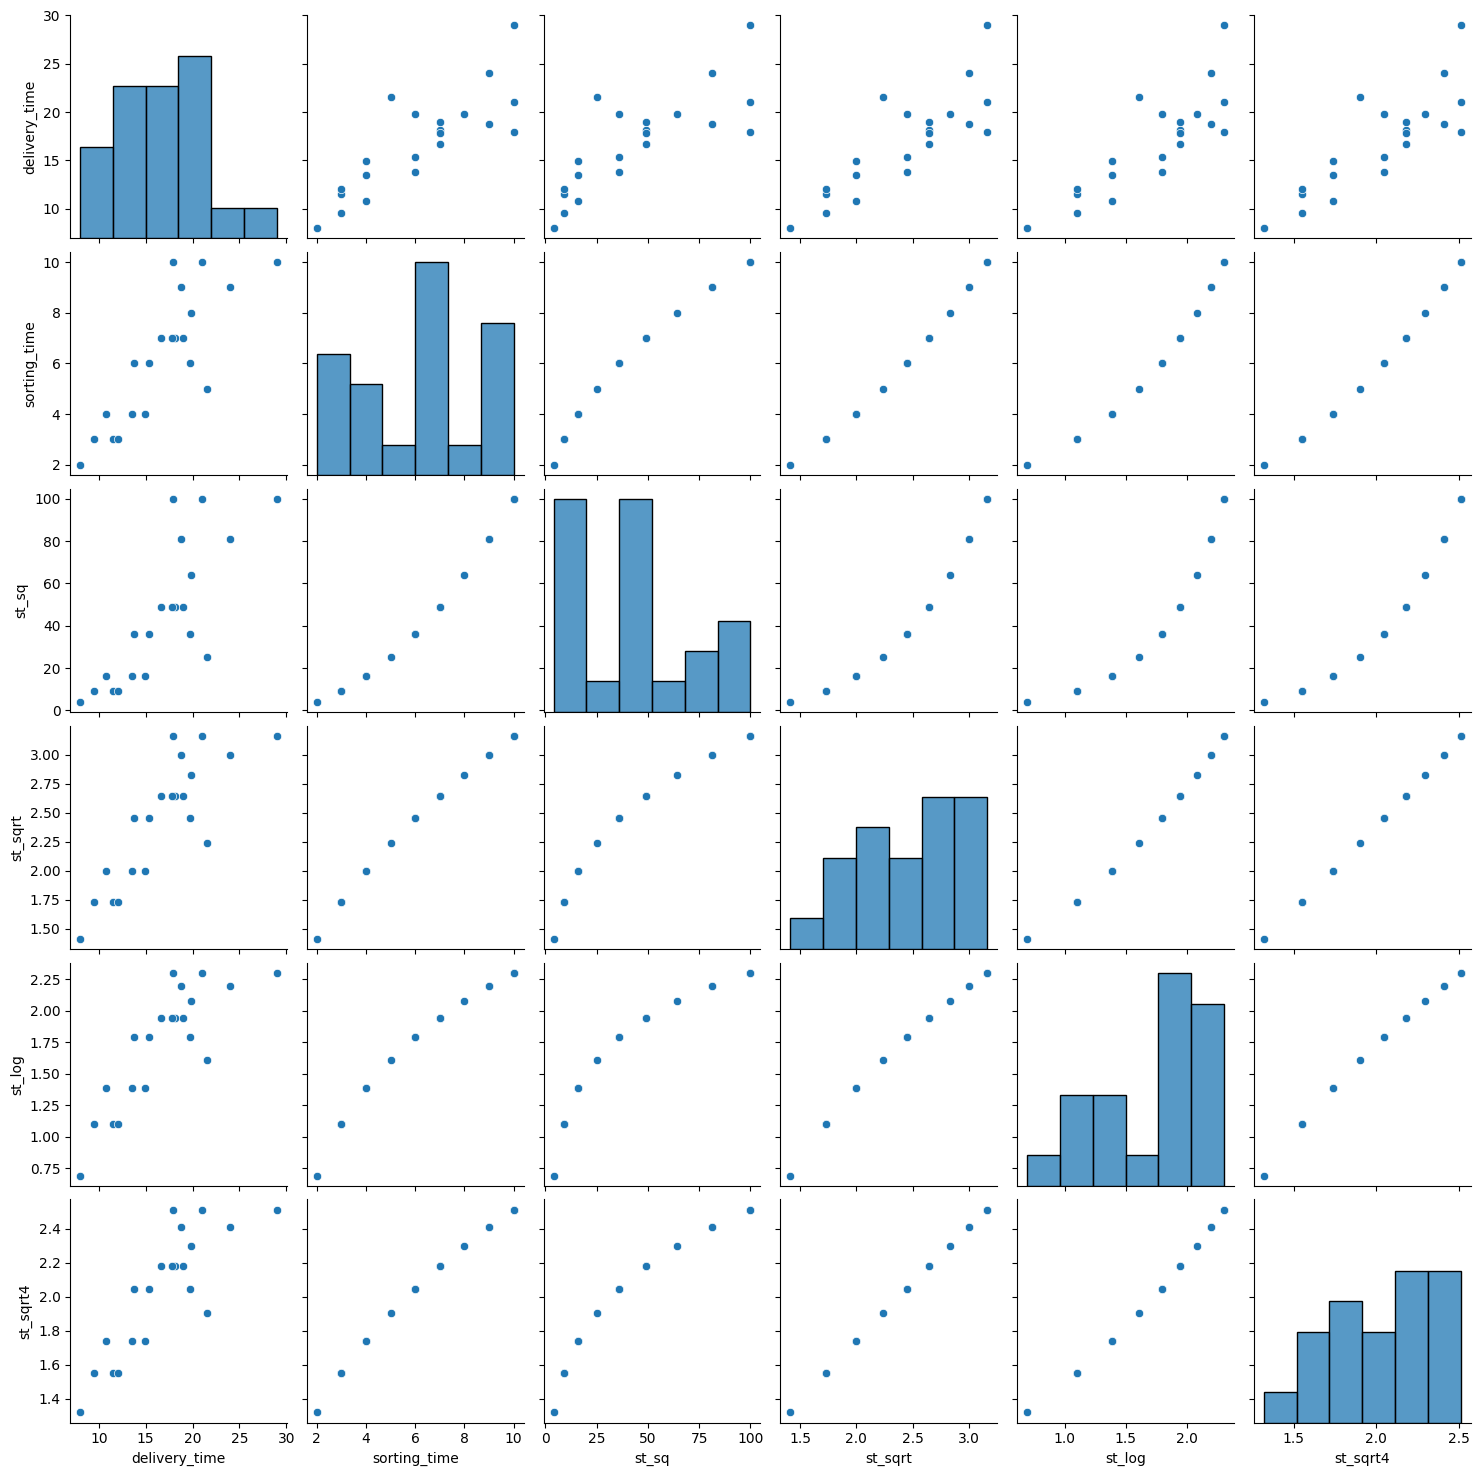

In [26]:
sns.pairplot(delivery)
delivery.corr()

The transformation of raised to the power of 0.4 has marginally higher correlation than the untransformed data and also other transformation

In [27]:
delivery

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4
0,21.00,10,100,3.162278,2.302585,2.511886
1,13.50,4,16,2.000000,1.386294,1.741101
2,19.75,6,36,2.449490,1.791759,2.047673
3,24.00,9,81,3.000000,2.197225,2.408225
4,29.00,10,100,3.162278,2.302585,2.511886
5,15.35,6,36,2.449490,1.791759,2.047673
6,19.00,7,49,2.645751,1.945910,2.177906
7,9.50,3,9,1.732051,1.098612,1.551846
8,17.90,10,100,3.162278,2.302585,2.511886
9,18.75,9,81,3.000000,2.197225,2.408225


<Axes: xlabel='st_sqrt4', ylabel='Density'>

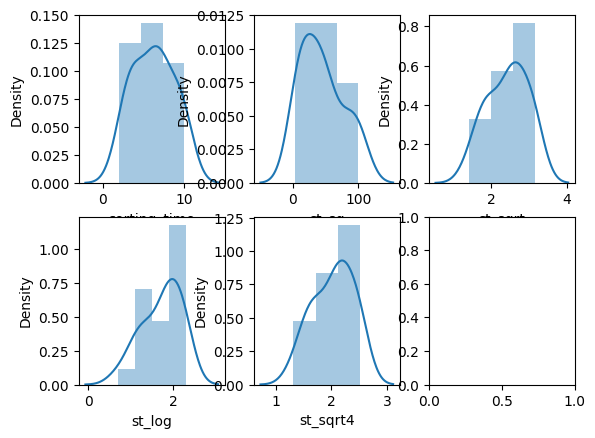

In [32]:
fig, axs=plt.subplots(2,3)
sns.distplot(delivery['sorting_time'],ax = axs[0,0])
sns.distplot(delivery['st_sq'],ax = axs[0,1])
sns.distplot(delivery['st_sqrt'],ax = axs[0,2])
sns.distplot(delivery['st_log'],ax = axs[1,0])
sns.distplot(delivery['st_sqrt4'],ax = axs[1,1])

Model for each transformation since correlation was similar

In [36]:
model = smf.ols("delivery_time~sorting_time",data=delivery).fit()
model_sq = smf.ols("delivery_time~st_sq",data=delivery).fit()
model_sqrt = smf.ols("delivery_time~st_sqrt",data=delivery).fit()
model_log = smf.ols("delivery_time~st_log",data=delivery).fit()
model_sqrt4 = smf.ols("delivery_time~st_sqrt4",data=delivery).fit()


In [38]:
print('rsquared values:',end='\n')
print('untransformed:{} square:{} square root:{} log:{} raised to 0.4:{}'.format(model.rsquared,model_sq.rsquared,model_sqrt.rsquared,model_log.rsquared,model_sqrt4.rsquared))


rsquared values:
untransformed:0.6822714748417231 square:0.6302871815826637 square root:0.695806227630867 log:0.6954434611324223 raised to 0.4:0.6969691412160728


model_sqrt4 has the best accuracy

In [39]:
model_sqrt4.params

Intercept    -7.050883
st_sqrt4     11.751321
dtype: float64

In [41]:
print(model_sqrt4.tvalues,model_sqrt4.pvalues,sep='\n')

Intercept   -1.926237
st_sqrt4     6.610589
dtype: float64
Intercept    0.069169
st_sqrt4     0.000003
dtype: float64


In [42]:
model_sqrt4.resid

0    -1.467100
1     0.090645
2     2.738026
3     2.751062
4     6.532900
5    -1.661974
6     0.457606
7    -1.685352
8    -4.567100
9    -2.498938
10   -0.116563
11   -2.659355
12   -1.862394
13    0.314648
14    0.844648
15    1.470645
16   -3.261974
17   -0.432394
18   -0.455078
19   -0.712394
20    6.180435
dtype: float64

In [43]:
model_sqrt4.rsquared

0.6969691412160728

Even with this transformation was only able to achieve an rsquare value of 69% which is marginally better than other transformations

In [44]:
delivery['predicted'] = model_sqrt.fittedvalues
delivery

,delivery_time,sorting_time,st_sq,st_sqrt,st_log,st_sqrt4,predicted
0,21.00,10,100,3.162278,2.302585,2.511886,22.578867
1,13.50,4,16,2.000000,1.386294,1.741101,13.354345
2,19.75,6,36,2.449490,1.791759,2.047673,16.921761
3,24.00,9,81,3.000000,2.197225,2.408225,21.290936
4,29.00,10,100,3.162278,2.302585,2.511886,22.578867
5,15.35,6,36,2.449490,1.791759,2.047673,16.921761
6,19.00,7,49,2.645751,1.945910,2.177906,18.479409
7,9.50,3,9,1.732051,1.098612,1.551846,11.227742
8,17.90,10,100,3.162278,2.302585,2.511886,22.578867
9,18.75,9,81,3.000000,2.197225,2.408225,21.290936


Predicting for new values

In [45]:
new=pd.DataFrame({"sorting_time":[7,6.5]})
new['st_sqrt4']=new.sorting_time**0.4
new

,sorting_time,st_sqrt4
0,7.0,2.177906
1,6.5,2.114294


In [46]:
new['prtedicted']=model_sqrt4.predict(new)
new

,sorting_time,st_sqrt4,prtedicted
0,7.0,2.177906,18.542394
1,6.5,2.114294,17.794862
